<a href="https://colab.research.google.com/github/nhatminh-it/testgit/blob/master/getnumber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import LinearSVC
from keras.datasets import mnist
from sklearn.metrics import accuracy_score
from google.colab.patches import cv2_imshow
#load data
(X_train,y_train),(X_test,y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [2]:
#cho x_train
X_train_feature = []
for i in range(len(X_train)):
    feature = hog(X_train[i],orientations=9,pixels_per_cell=(14,14),cells_per_block=(1,1),block_norm="L2")
    X_train_feature.append(feature)
X_train_feature = np.array(X_train_feature,dtype = np.float32)

#cho x_test
X_test_feature = []
for i in range(len(X_test)):
    feature = hog(X_test[i],orientations=9,pixels_per_cell=(14,14),cells_per_block=(1,1),block_norm="L2")
    X_test_feature.append(feature)
X_test_feature = np.array(X_test_feature,dtype=np.float32)

In [3]:
model = LinearSVC(C=10)
model.fit(X_train_feature,y_train)
y_pre = model.predict(X_test_feature)
print(accuracy_score(y_test,y_pre))

0.8988


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [87]:
image = cv2.imread("/content/image1.jpg")
image = cv2.resize(image,(400,400))

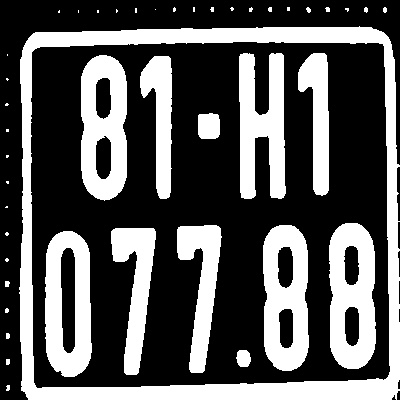

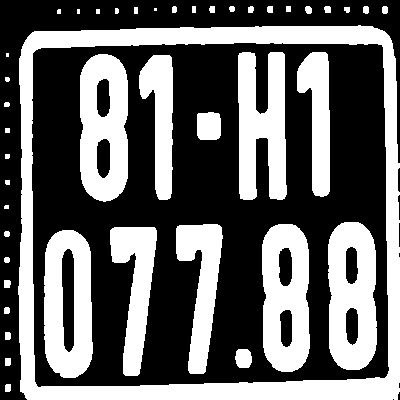

In [88]:
roi_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
roi_blur = cv2.GaussianBlur(roi_gray,(3,3),1)
ret,thre = cv2.threshold(roi_blur,130,255,cv2.THRESH_BINARY_INV)
cv2_imshow(thre)
kerel3 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
thre_mor = cv2.morphologyEx(thre,cv2.MORPH_DILATE,kerel3)
cv2_imshow(thre_mor)
contours, hierarchy = cv2.findContours(thre_mor,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [89]:
areas_ind = {}
areas = []
for ind,cnt in enumerate(contours) :
  area = cv2.contourArea(cnt)
  areas_ind[area] = ind
  areas.append(area)
areas = sorted(areas,reverse=True)[2:11]
areas

[6289.5, 6265.0, 6233.0, 6147.0, 5091.5, 3515.5, 3510.0, 2839.5, 2813.5]

In [59]:
rects = [cv2.boundingRect(cnt) for cnt in contours]

[8]
[0]
[8]
[8]
[1]
[7]
[7]
[7]
[7]


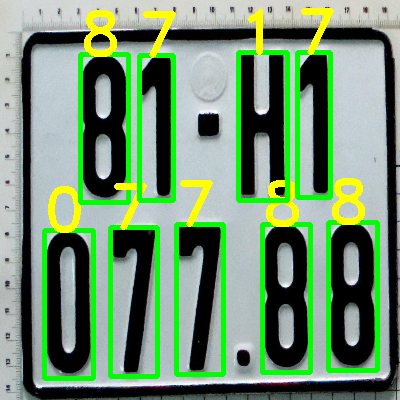

In [90]:
for i in areas:
    (x,y,w,h) = cv2.boundingRect(contours[areas_ind[i]])
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
    roi = thre[y:y+h,x:x+w]
    roi = np.pad(roi,(20,20),'constant',constant_values=(0,0))
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    #cv2_imshow(roi)   
    # Calculate the HOG features
    roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1),block_norm="L2")
    nbr = model.predict(np.array([roi_hog_fd], np.float32))
    print(nbr)
    cv2.putText(image, str(int(nbr[0])), (x, y),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)
cv2_imshow(image)
cv2.imwrite("image_pand.jpg",image)
cv2.waitKey()
cv2.destroyAllWindows()